<a href="https://colab.research.google.com/github/plaban1981/Vectorstores/blob/main/Setup_Face_recognition_with_Python_CV2_and_Qdrant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install imgbeddings

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.6 MB/s eta 0:00:00
  Created wheel for imgbeddings: filename=imgbeddings-0.1.0-py3-none-any.whl size=9320 sha256=20f30ebf2b3ccb6ac21e764bf3e033b6156f82792faead61aa4a219dc50f5a45
  Stored in directory: /root/.cache/pip/wheels/4e/c9/9c/5f94fd783ce863540e5999f4bc2afd1501ddaea942ee6413fc
Successfully built imgbeddings


In [8]:
! pip install opencv-python

* Download the haarcascade_frontalface_default.xml pre-trained Haar Cascade model from the [OpenCV GitHub repository](https://github.com/opencv/opencv/tree/master/data/haarcascades) and store it locally.

## To "extract" faces from the pictures we used Python, OpenCV a computer vision tool and a pre-trained Haar Cascade model

In [7]:
# importing the cv2 library
import cv2
# loading the haar case algorithm file into alg variable
alg = "haarcascade_frontalface_default.xml"
# passing the algorithm to OpenCV
haar_cascade = cv2.CascadeClassifier(alg)
# loading the image path into file_name variable
file_name = '/content/plabannayak_passport_photo.jpg'
# reading the image
img = cv2.imread(file_name, 0)
# creating a black and white version of the image
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# detecting the faces
faces = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=2, minSize=(100, 100))
# for each face detected
for x, y, w, h in faces:
    # crop the image to select only the face
    cropped_image = img[y : y + h, x : x + w]
    # loading the target image path into target_file_name variable
    target_file_name = 'target_photo_1.jpg'
    cv2.imwrite(
        target_file_name,
        cropped_image,
    )

Where:

* gray_img is the source image where we need to find faces
* scaleFactor is the scaling factor, the higher ratio the more compression and more loss in image quality
* minNeighbors the amount of neighbour faces to collect. The higher the more the same face could appear multiple times.
* minSize the minimum size of a detected face, in this case a square of 100 pixels.

The for loop iterates over all the faces detected and stores them in separated files, you might want to define a variable (maybe using the x and y parameters) to store the various faces in different files.

Moreover, if you plan to calculate embeddings over a series of pictures, you'll want to encapsulate the above code in a loop parsing all the files in a specific folder.

The result of the face detection stage is not perfect: it identifies three faces out of the four that are visible, but is good enough for our purpose. You can fine tune the algorithm parameters to find the better fit for your use cases.

## Calculate the embeddings
Once we identified the faces, we can now calculate the embeddings. For this step we are going to use imgbeddings, a Python package to generate embedding vectors from images, using OpenAI's CLIP model via Hugging Face transformers.

To calculate the embeddings of a picture, we need to first install the required packages via
```
pip install imgbeddings
pip install pillow

```

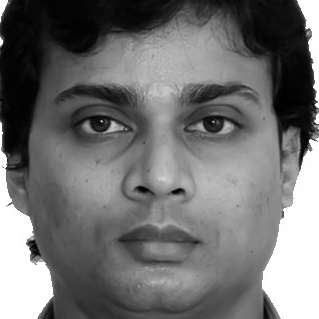

In [163]:
Image.open("/content/target_photo_1.jpg")

## Helper function to detect face from images

In [174]:
def detect_face(image_path,target_path):
  # loading the haar case algorithm file into alg variable
  alg = "haarcascade_frontalface_default.xml"
  # passing the algorithm to OpenCV
  haar_cascade = cv2.CascadeClassifier(alg)
  # loading the image path into file_name variable
  file_name = image_path
  # reading the image
  img = cv2.imread(file_name, 0)
  # creating a black and white version of the image
  gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  # detecting the faces
  faces = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=2, minSize=(100, 100))
  # for each face detected
  for x, y, w, h in faces:
      # crop the image to select only the face
      cropped_image = img[y : y + h, x : x + w]
      # loading the target image path into target_file_name variable
      target_file_name = target_path
      cv2.imwrite(
          target_file_name,
          cropped_image,
      )

In [175]:
os.mkdir("target")

In [176]:
file_path = "/content/photos"
for item in os.listdir(file_path):
    if item.endswith(".jpeg"):
        detect_face(os.path.join(file_path,item),os.path.join("/content/target",item))

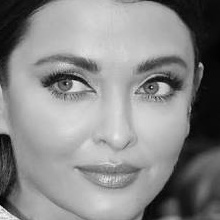

In [177]:
Image.open("/content/target/Aishw.jpeg")

In [164]:
# importing the required libraries
import numpy as np
from imgbeddings import imgbeddings
from PIL import Image
# loading the face image path into file_name variable
file_name = "/content/target_photo_1.jpg"
# opening the image
img = Image.open(file_name)
# loading the `imgbeddings`
ibed = imgbeddings()
# calculating the embeddings
embedding = ibed.to_embeddings(img)[0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/processing_clip.py:143: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [11]:
embedding.shape

(768,)

In [167]:
emb_array = np.array(embedding).reshape(1,-1)

In [173]:
type(emb_array)

numpy.ndarray

In [168]:
emb_array.shape

(1, 768)

In [171]:
len(emb_array.tolist())

1

In [166]:
len(embedding.tolist())

768

## Helper Function to generate embeddings for the images

In [178]:
import numpy as np
from imgbeddings import imgbeddings
from PIL import Image
def generate_embeddings(image_path):
  #
  # loading the face image path into file_name variable
  file_name = "/content/target_photo_1.jpg"
  # opening the image
  img = Image.open(file_name)
  # loading the `imgbeddings`
  ibed = imgbeddings()
  # calculating the embeddings
  embedding = ibed.to_embeddings(img)[0]
  emb_array = np.array(embedding).reshape(1,-1)
  return emb_array

## Loop through the images and build a list of image embeddings

In [179]:
img_embeddings = [generate_embeddings(os.path.join("/content/target",item)) for item in os.listdir("/content/target")]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/processing_clip.py:143: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [180]:
len(img_embeddings)

6

In [181]:
img_embeddings[0].shape

(1, 768)

In [184]:
np.save("vectors_cv2", np.array(img_embeddings), allow_pickle=False)

In [182]:
# Create a local Qdrant vector store
client =QdrantClient(path="qdrant_db_cv2")

In [183]:
my_collection = "image_collection_cv2"
client.recreate_collection(
    collection_name=my_collection,
    vectors_config=models.VectorParams(size=768, distance=models.Distance.COSINE)
)

True

In [186]:
payload = []
files_list= os.listdir("/content/target")
for i in range(len(os.listdir("/content/target"))):
    payload.append({"image_id" :i,
                    "name":files_list[i].split(".")[0]})

payload[:3]

[{'image_id': 0, 'name': 'kajol'},
 {'image_id': 1, 'name': 'nohra'},
 {'image_id': 2, 'name': 'deepika'}]

In [187]:
ids = list(range(len(os.listdir("/content/target"))))
embeddings = np.load("vectors_cv2.npy").tolist()

In [188]:
len(embeddings)

6

In [191]:
len(embeddings[0][0])

768

In [192]:
batch_size = 10

for i in range(0, len(os.listdir("/content/target"))):
    client.upsert(
        collection_name=my_collection,
        points=models.Batch(
            ids=[ids[i]],
            vectors=embeddings[i],
            payloads=[payload[i]]
        )
    )

In [193]:
client.count(
    collection_name=my_collection,
    exact=True,
)

CountResult(count=6)

In [194]:
client.scroll(
    collection_name=my_collection,
    limit=10
)

([Record(id=0, payload={'image_id': 0, 'name': 'kajol'}, vector=None, shard_key=None),
  Record(id=1, payload={'image_id': 1, 'name': 'nohra'}, vector=None, shard_key=None),
  Record(id=2, payload={'image_id': 2, 'name': 'deepika'}, vector=None, shard_key=None),
  Record(id=3, payload={'image_id': 3, 'name': 'Aishw'}, vector=None, shard_key=None),
  Record(id=4, payload={'image_id': 4, 'name': 'aish'}, vector=None, shard_key=None),
  Record(id=5, payload={'image_id': 5, 'name': 'kareena'}, vector=None, shard_key=None)],
 None)

## Image Search

In [201]:
# importing the cv2 library
import cv2
# loading the haar case algorithm file into alg variable
alg = "haarcascade_frontalface_default.xml"
# passing the algorithm to OpenCV
haar_cascade = cv2.CascadeClassifier(alg)
# loading the image path into file_name variable
file_name = '/content/target/Aishw.jpeg'
# reading the image
img = cv2.imread(file_name, 0)
# creating a black and white version of the image
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# detecting the faces
faces = haar_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=2, minSize=(100, 100))
# for each face detected
for x, y, w, h in faces:
    # crop the image to select only the face
    cropped_image = img[y : y + h, x : x + w]
    # loading the target image path into target_file_name variable
    target_file_name = 'black.jpeg'
    cv2.imwrite(
        target_file_name,
        cropped_image,
    )

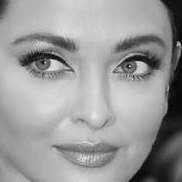

In [202]:
Image.open("/content/black.jpeg")

In [203]:
query_embedding = generate_embeddings("/content/black.jpeg")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/processing_clip.py:143: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [204]:
type(query_embedding)

numpy.ndarray

In [206]:
query_embedding.shape

(1, 768)

In [210]:
len(query_embedding.tolist())

1

In [215]:
results = client.search(
    collection_name=my_collection,
    query_vector=query_embedding[0],
    limit=5,
    with_payload=True
)

In [216]:
results

[ScoredPoint(id=3, version=0, score=0.9999998807907104, payload={'image_id': 3, 'name': 'Aishw'}, vector=None, shard_key=None),
 ScoredPoint(id=2, version=0, score=0.9999998807907104, payload={'image_id': 2, 'name': 'deepika'}, vector=None, shard_key=None),
 ScoredPoint(id=1, version=0, score=0.9999998807907104, payload={'image_id': 1, 'name': 'nohra'}, vector=None, shard_key=None),
 ScoredPoint(id=0, version=0, score=0.9999998807907104, payload={'image_id': 0, 'name': 'kajol'}, vector=None, shard_key=None),
 ScoredPoint(id=5, version=0, score=0.9999998211860657, payload={'image_id': 5, 'name': 'kareena'}, vector=None, shard_key=None)]

In [218]:
files_list= [ os.path.join("/content/target",f) for f in os.listdir("/content/target")]
files_list

['/content/target/kajol.jpeg',
 '/content/target/nohra.jpeg',
 '/content/target/deepika.jpeg',
 '/content/target/Aishw.jpeg',
 '/content/target/aish.jpeg',
 '/content/target/kareena.jpeg']

In [223]:
def see_images(results, top_k=2):
    for i in range(top_k):
        image_id = results[i].payload['image_id']
        name    = results[i].payload['name']
        score = results[i].score
        image = Image.open(files_list[image_id])

        print(f"Result #{i+1}: {name} was diagnosed with {score * 100} confidence")
        print(f"This image score was {score}")
        display(image)
        print("-" * 50)
        print()

## Display Results

Result #1: Aishw was diagnosed with 99.99998807907104 confidence
This image score was 0.9999998807907104


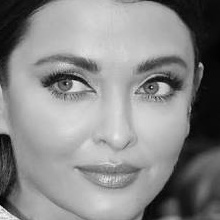

--------------------------------------------------

Result #2: deepika was diagnosed with 99.99998807907104 confidence
This image score was 0.9999998807907104


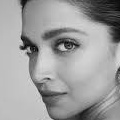

--------------------------------------------------

Result #3: nohra was diagnosed with 99.99998807907104 confidence
This image score was 0.9999998807907104


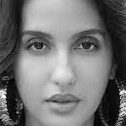

--------------------------------------------------

Result #4: kajol was diagnosed with 99.99998807907104 confidence
This image score was 0.9999998807907104


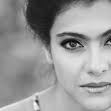

--------------------------------------------------

Result #5: kareena was diagnosed with 99.99998211860657 confidence
This image score was 0.9999998211860657


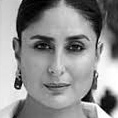

--------------------------------------------------



In [224]:
see_images(results, top_k=5)

In [12]:
import os
os.mkdir("photos")

In [13]:
! pip install -qU qdrant-client transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency r

In [14]:
from transformers import ViTImageProcessor, ViTModel
from qdrant_client import QdrantClient
from qdrant_client.http import models
from datasets import load_dataset
import numpy as np
import torch

In [17]:
# Create a local Qdrant vector store
client =QdrantClient(path="qdrant_db")

In [18]:
my_collection = "image_collection"
client.recreate_collection(
    collection_name=my_collection,
    vectors_config=models.VectorParams(size=384, distance=models.Distance.COSINE)
)

True

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = ViTImageProcessor.from_pretrained('facebook/dino-vits16')
model = ViTModel.from_pretrained('facebook/dino-vits16').to(device)

preprocessor_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/86.7M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [116]:
import pandas as pd
import os
image_file = []
image_name =[]
#
for file in os.listdir("/content/photos"):
    if file.endswith(".jpeg"):
        image_name.append(file.split(".")[0])
        image_file.append(Image.open(os.path.join("/content/photos",file)))


In [117]:
len(image_file)

9

In [40]:
from PIL import Image
type(Image.open(image_file[0]))

PIL.JpegImagePlugin.JpegImageFile

In [118]:
df = pd.DataFrame({"Image":image_file,"Name":image_name})

In [119]:
df

,Image,Name
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,kajol
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,kagna
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,nohra
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,deepika
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,kj
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Aishw
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,aish
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,kareena
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,shakti


In [120]:
descriptions = df['Name'].tolist()
descriptions

['kajol',
 'kagna',
 'nohra',
 'deepika',
 'kj',
 'Aishw',
 'aish',
 'kareena',
 'shakti']

## Image Embeddings

In computer vision systems, vector databases are used to store image features. These image features are vector representations of images that capture their visual content, and they are used to improve the performance of computer vision tasks such as object detection, image classification, and image retrieval.

To extract these useful feature representation from our images, we'll use vision transformers (ViT). ViTs are advanced algorithms that enable computers to "see" and understand visual information in a similar fashion to humans. They use a transformer architecture to process images and extract meaningful features from them.

To understand how ViTs work, imagine you have a large jigsaw puzzle with many different pieces. To solve the puzzle, you would typically look at the individual pieces, their shapes, and how they fit together to form the full picture. ViTs work in a similar way, meaning, instead of looking at the entire image at once, vision transformers break it down into smaller parts called "patches." Each of these patches is like one piece of the puzzle that captures a specific portion of the image, and these pieces are then analyzed and processed by the ViTs.

By analyzing these patches, the ViTs identify important patterns such as edges, colors, and textures, and combines them to form a coherent understanding of a given image.

That said, let's get started using transformers to extract features from our images.

## Generate Embeddings

In [121]:
final_embeddings = []
for item in df['Image'].values.tolist():
    inputs = processor(images=item, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs).last_hidden_state.mean(dim=1).cpu().numpy()
    final_embeddings.append(outputs)

In [122]:
len(final_embeddings)

9

In [123]:
final_embeddings[0].shape

(1, 384)

In [172]:
type(final_embeddings[0])

numpy.ndarray

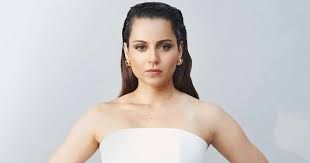

In [126]:
df.iloc[1]['Image']

In [127]:
np.save("vectors", np.array(final_embeddings), allow_pickle=False)

In [128]:
payload = []
for i in range(df.shape[0]):
    payload.append({"image_id" :i,
                    "name":df.iloc[i]['Name']})

payload[:3]

[{'image_id': 0, 'name': 'kajol'},
 {'image_id': 1, 'name': 'kagna'},
 {'image_id': 2, 'name': 'nohra'}]

In [129]:
ids = list(range(df.shape[0]))
embeddings = np.load("vectors.npy").tolist()

In [130]:
ids

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [131]:
batch_size = 10

for i in range(0, df.shape[0]):
    client.upsert(
        collection_name=my_collection,
        points=models.Batch(
            ids=[ids[i]],
            vectors=embeddings[i],
            payloads=[payload[i]]
        )
    )

In [132]:
client.count(
    collection_name=my_collection,
    exact=True,
)

CountResult(count=9)

In [133]:
client.scroll(
    collection_name=my_collection,
    limit=10
)

([Record(id=0, payload={'image_id': 0, 'name': 'kajol'}, vector=None, shard_key=None),
  Record(id=1, payload={'image_id': 1, 'name': 'kagna'}, vector=None, shard_key=None),
  Record(id=2, payload={'image_id': 2, 'name': 'nohra'}, vector=None, shard_key=None),
  Record(id=3, payload={'image_id': 3, 'name': 'deepika'}, vector=None, shard_key=None),
  Record(id=4, payload={'image_id': 4, 'name': 'kj'}, vector=None, shard_key=None),
  Record(id=5, payload={'image_id': 5, 'name': 'Aishw'}, vector=None, shard_key=None),
  Record(id=6, payload={'image_id': 6, 'name': 'aish'}, vector=None, shard_key=None),
  Record(id=7, payload={'image_id': 7, 'name': 'kareena'}, vector=None, shard_key=None),
  Record(id=8, payload={'image_id': 8, 'name': 'shakti'}, vector=None, shard_key=None)],
 None)

## Helper Function to display results

In [195]:
def see_images(results, top_k=2):
    for i in range(top_k):
        image_id = results[i].payload['image_id']
        name    = results[i].payload['name']
        score = results[i].score
        image = df.iloc[image_id]['Image']

        print(f"Result #{i+1}: {name} was diagnosed with {score * 100} confidence")
        print(f"This image score was {score}")
        display(image)
        print("-" * 50)
        print()

In [156]:
img = Image.open("/content/kj.jpeg")

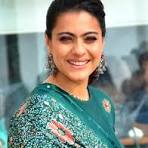

In [157]:
img

In [158]:
inputs = processor(images=img, return_tensors="pt").to(device)
inputs['pixel_values'].shape, inputs

(torch.Size([1, 3, 224, 224]),
 {'pixel_values': tensor([[[[ 0.8276,  0.7933,  0.7248,  ...,  1.8893,  1.9064,  1.9064],
           [ 0.8276,  0.7933,  0.7248,  ...,  1.8893,  1.9064,  1.9064],
           [ 0.8447,  0.7933,  0.7248,  ...,  1.8893,  1.9064,  1.9064],
           ...,
           [ 0.7419,  0.8447,  0.9132,  ..., -1.0562, -1.0219, -1.0048],
           [ 0.6392,  0.7762,  0.8961,  ..., -0.9877, -0.9363, -0.9192],
           [ 0.5878,  0.7419,  0.8961,  ..., -0.9534, -0.8849, -0.8507]],
 
          [[ 1.5007,  1.4657,  1.3957,  ...,  2.3235,  2.3410,  2.3410],
           [ 1.5007,  1.4657,  1.3957,  ...,  2.3235,  2.3410,  2.3410],
           [ 1.5182,  1.4657,  1.3957,  ...,  2.3235,  2.3410,  2.3410],
           ...,
           [ 1.3431,  1.4482,  1.5357,  ..., -0.6001, -0.5651, -0.5476],
           [ 1.2381,  1.3782,  1.5357,  ..., -0.5301, -0.4776, -0.4601],
           [ 1.1856,  1.3606,  1.5357,  ..., -0.4951, -0.4251, -0.3901]],
 
          [[ 1.5071,  1.4722,  1.4025,

In [159]:
one_embedding = model(**inputs).last_hidden_state
one_embedding.shape, one_embedding[0, 0, :20]

(torch.Size([1, 197, 384]),
 tensor([ 0.5319, -2.0321, -3.2433,  2.3003,  2.2144, -1.0454,  3.1589,  2.0345,
          3.4048, -4.2727,  0.0944,  2.6222,  4.7337,  3.6991,  2.3052,  5.4628,
          6.9143, -9.8443,  2.6509, -4.0431], grad_fn=<SliceBackward0>))

In [160]:
one_embedding.mean(dim=1).shape

torch.Size([1, 384])

In [161]:
results = client.search(
    collection_name=my_collection,
    query_vector=one_embedding.mean(dim=1)[0].tolist(),
    limit=5,
    with_payload=True
)

Result #1: kj was diagnosed with 99.99999931312833 confidence
This image score was 0.9999999931312833


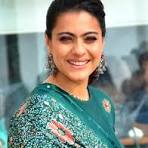

--------------------------------------------------

Result #2: Aishw was diagnosed with 86.44909281001614 confidence
This image score was 0.8644909281001614


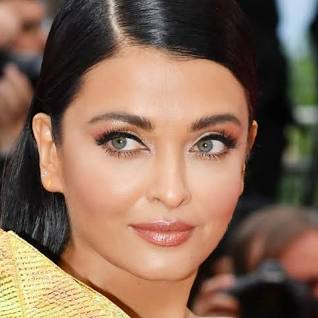

--------------------------------------------------



In [162]:
see_images(results, top_k=2)

## Search for a new image

In [140]:
img2 = Image.open("/content/Aishw.jpeg")

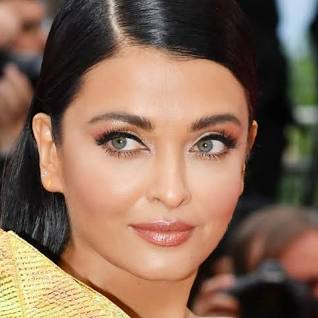

In [141]:
img2

In [144]:
inputs = processor(images=img2, return_tensors="pt").to(device)
one_embedding = model(**inputs).last_hidden_state

In [146]:
results = client.search(
    collection_name=my_collection,
    query_vector=one_embedding.mean(dim=1)[0].tolist(),
    limit=5,
    with_payload=True
)

In [150]:
results

[ScoredPoint(id=5, version=0, score=1.0000000144622252, payload={'image_id': 5, 'name': 'Aishw'}, vector=None, shard_key=None),
 ScoredPoint(id=3, version=0, score=0.9048531271076924, payload={'image_id': 3, 'name': 'deepika'}, vector=None, shard_key=None),
 ScoredPoint(id=2, version=0, score=0.8862201422801974, payload={'image_id': 2, 'name': 'nohra'}, vector=None, shard_key=None),
 ScoredPoint(id=6, version=0, score=0.8771421890846095, payload={'image_id': 6, 'name': 'aish'}, vector=None, shard_key=None),
 ScoredPoint(id=7, version=0, score=0.8680090570447916, payload={'image_id': 7, 'name': 'kareena'}, vector=None, shard_key=None)]

In [149]:
payload[0]

{'image_id': 0, 'name': 'kajol'}

Result #1: Aishw was diagnosed with 100.00000144622251 confidence
This image score was 1.0000000144622252


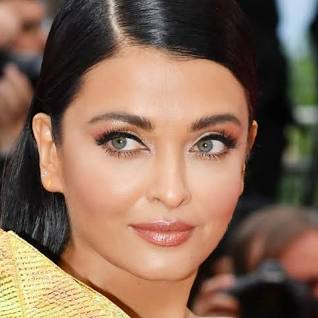

--------------------------------------------------

Result #2: deepika was diagnosed with 90.48531271076924 confidence
This image score was 0.9048531271076924


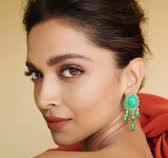

--------------------------------------------------

Result #3: nohra was diagnosed with 88.62201422801974 confidence
This image score was 0.8862201422801974


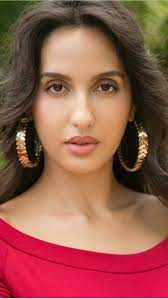

--------------------------------------------------

Result #4: aish was diagnosed with 87.71421890846095 confidence
This image score was 0.8771421890846095


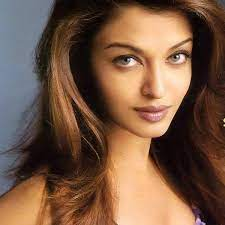

--------------------------------------------------

Result #5: kareena was diagnosed with 86.80090570447916 confidence
This image score was 0.8680090570447916


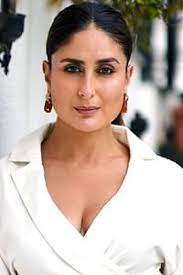

--------------------------------------------------



In [154]:
see_images(results, top_k=5)

#### References:
* https://aiven.io/developer/find-faces-with-pgvector
* https://github.com/qdrant/examples/tree/master/qdrant_101_image_data